## Observations and Insights 

These are three things that can be inferred from this data:
1.) The introduction of the four targetted tumor therapies show that the volume of a tumor does decrease as function of time once introduced into a mouse.
2.) Based on both the smaller interquartile range and the overall lower tumor volume the most effective therapeudic appears to be Capomulin
3.) Tumor size appears to be a function of the weight of the mouse which means smaller weight mice may have better health outcomes if they size is reduced.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = mouse_metadata.merge(study_results, how='left', on='Mouse ID')
# Display the data table for preview
combined_data.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898   

In [2]:
# Checking the number of mice.
ans = len(combined_data['Mouse ID'].unique())
ans

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
test_df = combined_data[['Mouse ID', 'Timepoint']]
is_duplicate = test_df.duplicated()
dupe_index = is_duplicate[is_duplicate == True].index
combined_data = combined_data.drop(dupe_index).reset_index(drop=True)
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(combined_data['Mouse ID'].unique()))

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
volume_df = combined_data[['Drug Regimen', 'Tumor Volume (mm3)']]
tumor_df = volume_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = tumor_df.mean()
median = tumor_df.median()
var = tumor_df.var()
stdev = tumor_df.std()
sem = tumor_df.sem()
summary_frame = mean.merge(median, on='Drug Regimen', how='left')
summary_frame = summary_frame.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume Mean', 'Tumor Volume (mm3)_y': 'Tumor Volume Median'})
summary_frame = summary_frame.merge(var, on='Drug Regimen', how='left')
summary_frame = summary_frame.merge(stdev, on='Drug Regimen', how='left')
summary_frame = summary_frame.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume Variance', 'Tumor Volume (mm3)_y': 'Tumor Volume Stdev'})
summary_frame = summary_frame.merge(sem, on='Drug Regimen', how='left')
summary_frame = summary_frame.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume SEM'})
summary_frame

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Stdev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
vol_group = volume_df.groupby('Drug Regimen')
sum_frame = vol_group.agg(['mean', 'median', np.var, np.std, 'sem'], axis='columns')
sum_frame

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug', ylabel='Count'>

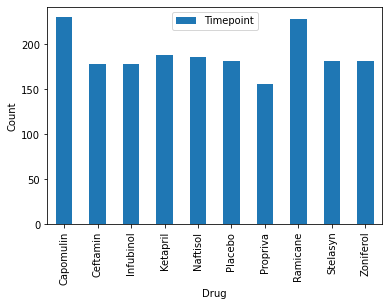

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_frame = combined_data[['Drug Regimen', 'Timepoint']]
bar_group = bar_frame.groupby('Drug Regimen')
bar_df = bar_group.count()
bar_df.plot(kind='bar', xlabel='Drug', ylabel='Count')

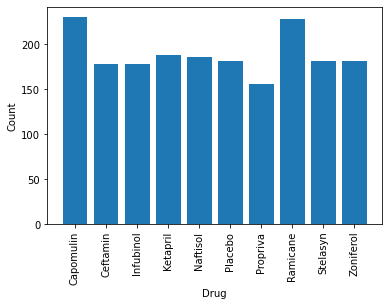

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(bar_df.index, bar_df['Timepoint'])
plt.xlabel('Drug')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Mouse ID'>

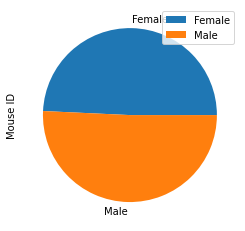

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_frame = combined_data[['Sex', 'Mouse ID']]
sex_group = sex_frame.groupby('Sex')
sex_df = sex_group.count()
sex_df.plot(kind='pie',labels=sex_df.index, y='Mouse ID')
#sex_df.columns

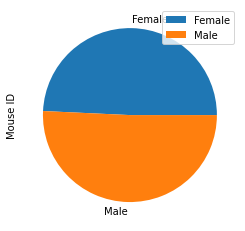

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df['Mouse ID'], labels=sex_df.index)
plt.ylabel('Mouse ID')
plt.legend()
plt.show()


## Quartiles, Outliers and Boxplots

In [49]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treat_frame = combined_data.loc[(combined_data['Drug Regimen'] == 'Capomulin') | (combined_data['Drug Regimen'] == 'Ramicane') | (combined_data['Drug Regimen'] ==  'Infubinol') | (combined_data['Drug Regimen'] == 'Ceftamin')].reset_index(drop=True)
# Start by getting the last (greatest) timepoint for each mouse
point_frame = treat_frame[['Mouse ID','Timepoint']]
treat_group = point_frame.groupby('Mouse ID')
treat_df = treat_group.max()
new_df = combined_data
newer_df = new_df.merge(treat_df, on='Mouse ID')
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
newer_df = newer_df.rename(columns={'Timepoint_x': 'Timepoint', 'Timepoint_y': 'Max Timepoint'})
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol = []
for index, row in newer_df.iterrows():
    if row['Timepoint'] == row['Max Timepoint']:
        tumor_vol.append(row['Tumor Volume (mm3)'])

In [39]:
# Put treatments into a list for for loop (and later for plot labels)
quartiles = np.quantile(tumor_vol, [0.25, 0.5, 0.75])
lowerq = quartiles[0]
upperq = quartiles[2]
iqr = upperq-lowerq
quartiles
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

22.742517952499995

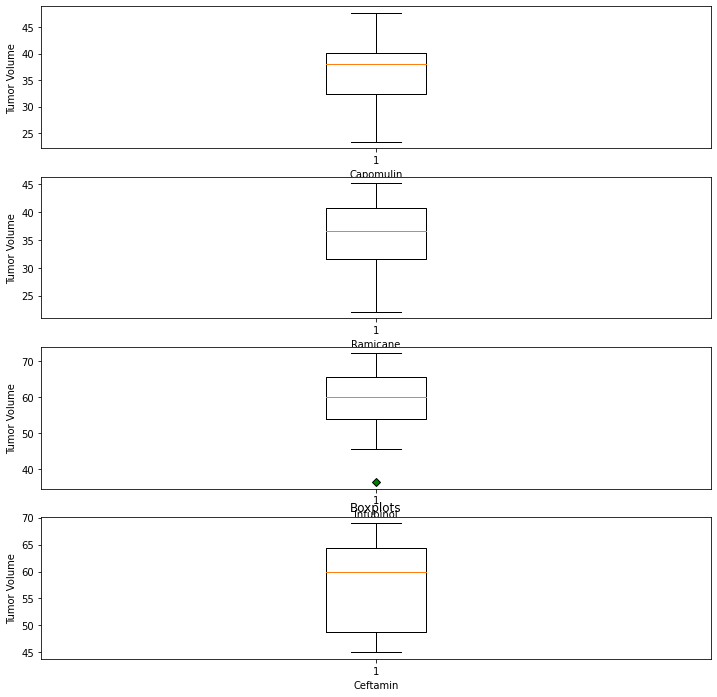

In [68]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_df = newer_df[['Mouse ID', 'Weight (g)', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)', 'Max Timepoint']]
tumor_df = tumor_df.loc[tumor_df['Timepoint'] == tumor_df['Max Timepoint']].reset_index(drop=True)
tumor_df
fig,(ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_figheight(12)
fig.set_figwidth(12)
drug_df = tumor_df.loc[tumor_df['Drug Regimen'] == drugs[0]]
drug_df2 = tumor_df.loc[tumor_df['Drug Regimen'] == drugs[1]]
drug_df3 = tumor_df.loc[tumor_df['Drug Regimen'] == drugs[2]]
drug_df4 = tumor_df.loc[tumor_df['Drug Regimen'] == drugs[3]]
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(drug_df['Tumor Volume (mm3)'], flierprops=green_diamond)
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel(drugs[0])
ax2.boxplot(drug_df2['Tumor Volume (mm3)'], flierprops=green_diamond)
ax2.set_ylabel('Tumor Volume')
ax2.set_xlabel(drugs[1])
ax3.boxplot(drug_df3['Tumor Volume (mm3)'], flierprops=green_diamond)
ax3.set_ylabel('Tumor Volume')
ax3.set_xlabel(drugs[2])
ax4.boxplot(drug_df4['Tumor Volume (mm3)'], flierprops=green_diamond)
ax4.set_ylabel('Tumor Volume')
ax4.set_xlabel(drugs[3])
plt.title('Boxplots')
plt.show()

## Line and Scatter Plots

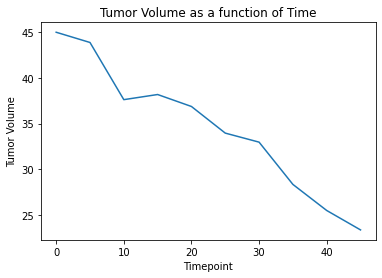

In [66]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
target_mouse = drug_df['Mouse ID']
target_mouse = target_mouse.iloc[0]
target_mouse
target_df = combined_data.loc[combined_data['Mouse ID'] == target_mouse]
target_df
plt.plot(target_df['Timepoint'], target_df['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume')
plt.xlabel('Timepoint')
plt.title('Tumor Volume as a function of Time')
plt.show()

## Correlation and Regression

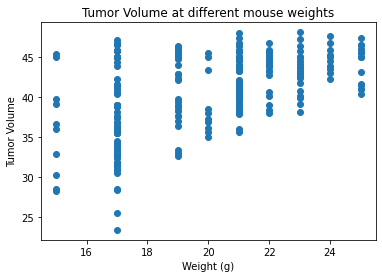

In [79]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
target_drug = drugs[0]
scatter_df = combined_data.loc[combined_data['Drug Regimen'] == target_drug].reset_index(drop=True)
plt.scatter(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)'])
plt.ylabel('Tumor Volume')
plt.xlabel('Weight (g)')
plt.title('Tumor Volume at different mouse weights')
plt.show()

0.5256995552077166
 y= 0.96*weight(g) + 21.49


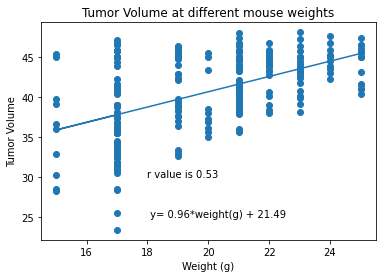

In [92]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
slope, inter, r, p, stdev = st.linregress(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)'])
line_of_fit = round(slope,2) * round(scatter_df['Weight (g)'],2) + round(inter, 2)
line_eq = f' y= {round(slope, 2)}*weight(g) + {round(inter, 2)}'
print(r)
print(line_eq)
plt.scatter(scatter_df['Weight (g)'], scatter_df['Tumor Volume (mm3)'])
plt.plot(scatter_df['Weight (g)'], (line_of_fit))
plt.ylabel('Tumor Volume')
plt.xlabel('Weight (g)')
plt.annotate(line_eq, [18, 25])
plt.annotate('r value is ' + str(round(r, 2)), [18,30])
plt.title('Tumor Volume at different mouse weights')
plt.show()